# Graded Assignment 1 - Air Quality and Weather in the Netherlands


# Introduction to This Template Notebook

* This is a **personal** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`,
**renamed** to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'
  ```
1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ (i.e. when you first modified this notebook, e.g. '2023-11-01') as strings between the `Author` markers.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


<div class="alert-danger alert" role="alert">
    <b>Important:</b> The use of external libraries, packages, or modules that have not been explicitly imported in the <a href=#Preparation>Preparation</a> part of this assignment is <b>forbidden</b>, except for the development of the bonus point task (cf. <a href=#Task-7.-Bonus:-Visualize-wind-impact-on-compound-concentrations>Task 7. Bonus: Visualize wind impact on compound concentrations</a>) <b>and</b> in the final poster task (cf. <a href=#Step-5.-Create-Your-Poster>Step 5. Create Your Poster</a>).
</div>

In [1]:
#// BEGIN_TODO [Author]

AUTHOR_NAME = 'Jiaqi Wang'
AUTHOR_ID_NR = '1986619'
AUTHOR_DATE = '2023-11-23'

#// END_TODO [Author]

---

## Table of Contents

- [Organizational Matters](#Organizational-Matters)
- [Introduction](#Introduction)
    - [Origin of the Data](#Origin-of-the-Data)
    - [Problem Statement](#Problem-Statement)
    - [Development of a Hypothesis](#Development-of-a-Hypothesis)
    - [Personalization of the Assignment](#Personalization-of-the-Assignment)
- [Dataset](#Dataset)
    - [Air Compounds](#Air-Compounds)
    - [The `df_data` Data Frame](#The-df_data-Data-Frame)
- [Preparation](#Preparation)
    - [Load the Libraries](#Load-the-Libraries)
    - [Load the Data](#Load-the-Data)
- [Part 1](#Part-1)
    - [Step 1. Weather Factor and Measurement Periods](#Step-1.-Weather-Factor-and-Measurement-Periods)
    - [Step 2. Exploration of Air Compounds and Weather Factors](#Step-2.-Exploration-of-Air-Compounds-and-Weather-Factors)
- [Part 2](#Part-2)
    - [Step 3. Predict the Air Quality](#Step-3.-Predict-the-Air-Quality)
- [Part 3](#Part-3)
    - [Step 4. Concluding Hypothesis](#Step-4.-Concluding-Hypothesis)
    - [Step 5. Create Your Poster](#Step-5.-Create-Your-Poster)
- [References](#References)

---

## Organizational Matters

Welcome to the first graded assignment of the course Foundations of Data Analytics (2IAB1)! This assignment consists of three parts:

- **Part 1.** The first part aims at *exploring the data* and coming up with an idea about which relationships to investigate. It consists of exploratory data analysis with visualizations, providing insights into the weather and air quality data and their relationship.

- **Part 2.** In the second part of the assignment, you have a bit more freedom. In this part, you will investigate more closely the relationship between weather factors and the concentrations of air compounds. In particular, you will make *predictions* about the air quality based on weather data.

- **Part 3.** In the last part of the assignment, you take the lessons that you have learned from *Part 1* and *Part 2* to:

    * Formulate a hypothesis about the relationship between a subset of weather factors and the concentration of air compounds.
    * Create a **poster** on which you report and discuss your findings.

The deadline for the graded assignment, involving both the submission of this notebook and your poster, is **Friday December 8, 2023, at 21:00**.

Your assignment will be graded on three components: 
1. the work in this notebook, graded by Momotor, 
1. your poster, and 
1. the peer review. 

For the precise assessment criteria, see the [study guide on Canvas](https://canvas.tue.nl/courses/25708/pages/study-guide-2iab1-foundations-of-data-analytics).

<div class="alert alert-block alert-danger">
<b>Three very important remarks:</b> <br>
    
1. Ensure that the **visualizations that you include in your poster** are also produced by your notebook and that they follow suggested best practices. **Double-check** if the visualizations are produced correctly on Momotor under the **Running submitted notebook** tab. Note that the visualizations displayed on Momotor might differ from the ones produced on your computer! This is due to the use of a testing database which contains less data than the one you have. After the deadline the same database will be used, so in the final evaluation the visualizations should be the same.
2. Submit your notebook already before the deadline and make sure **Momotor does not give any errors in any tab**. If so, it might happen that the rest of the assignment is negatively impacted, meaning extra points might be deducted.
3. **Do not write anything _outside_ marker lines `BEGIN_TODO ... END_TODO`**, otherwise Momotor won't be able to detect your code.
</div>

---

## Introduction

Problems with air quality and air-polluting industries draw a lot of attention and lead to political debates. 
The weather can also have a significant impact on air quality (Czarnecka & Nidzgorska-Lencewicz, 2011). 
Researchers have shown that weather data should be taken into account when measuring air pollution and estimating the effects of air pollution prevention strategies (Grell & Baklanov 2011). 

**Air quality** is determined by measuring the concentrations of different pollutants, with ground-level ozone ($O_3$), particle pollution (or particulate matter like $PM2.5$ and $PM10$), carbon monoxide ($CO$), sulfur dioxide ($SO_2$), and nitrogen dioxide ($NO_2$) being the five major ones as reported by the [U.S Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/).
Low air quality has proven to pose a serious threat to health and the environment (Qin et al., 2017).

**Weather** factors such as *sunshine*, *temperature*, *rain*, and *wind speed* can make pollutants undergo certain chemical reactions, speed up the reaction process, wash out dissolvable pollutants, or disperse pollutants in a given area. 
For example, ozone ($O_3$) forms when nitrogen oxides ($NO_x$) coming from different sources, like vehicle exhaust and industrial emissions, react with volatile organic compounds in the presence of heat and sunlight (NOAA's National Weather Service, 2017).
There is also evidence that the increase of certain pollutants, such as $O_3$, together with high temperatures, results in an increase in mortality (NOAA's National Weather Service, 2017). 

### Origin of the Data
For this assignment, we will use air quality data from the Dutch website [luchtmeetnet](https://www.luchtmeetnet.nl/), which is an initiative of the Ministry of Infrastructure and Water Management, the National Institute of Public Health and the Environment (RIVM), GGD Amsterdam, EPA for the greater Rotterdam area (DCMR), EPA South Limburg (RUDZL), EPA Middle and Western Brabant (OMWB), and EPA Region Arnhem (ODRA).
The [dataset](https://data.rivm.nl/data/luchtmeetnet) is hosted by the National Institute for Public Health and the Environment—a.k.a. Rijksinstituut voor Volksgezondheid en Milieu (RIVM). 
The air quality dataset reports concentrations of various chemical compounds measured and recorded from 2012 until 2021 by 125 stations located all over the Netherlands. (The 2022 data is not included, as it is not yet validated at the time this assignment is published.)

Furthermore, to contrast the air quality data against weather factor behavior, we will also analyze [climatologic data](https://www.knmi.nl/nederland-nu/klimatologie/uurgegevens) collected by the Royal Netherlands Meteorological Institute—a.k.a. Koninklijk Nederlands Meteorologisch Instituut (KNMI).
The KNMI is the national weather service of the Netherlands.
One of its main tasks consists of weather monitoring and forecasting. 
The original dataset reports weather information from 1951 until the present date.
Since then, 50 stations have been set up to collect weather measurements.

The current air quality (blue dots) and weather stations (orange dots) are shown in Figure 1.

![stations_map](GA1_files/stations_map.png)
<figcaption style="text-align: center;"><b>Figure 1. Map of the Netherlands with the air quality and weather stations considered in the dataset.</b></figcaption>

### Problem Statement

How do certain weather factors impact air quality? 
Is there a correlation between weather factors and air compounds?
These and other questions are to be answered by the analysis we will perform on the air quality and weather data sources.
Deriving insightful conclusions from real data is the main goal of this assignment.

**Problem:** How is the air quality in the Netherlands influenced by certain weather conditions?

### Development of a Hypothesis

The work in this assignment will be largely exploratory, and one of its aims is to develop a feeling on whether and how weather factors are related to compounds associated with air quality. Subquestions that will come by are:

* Is there a relation between the concentration of air compounds and the day, week, or month of the year?
* Is there a relation between the concentration of different air compounds?
* Is there a relation between weather factors and the concentration of air compounds?

At the end of the assignment, you will be asked to formulate your current hypothesis about the relationship between compounds measuring air quality and weather factors.

### Personalization of the Assignment

This assignment is personalized. 
You will focus on the measurements of two air compounds measured by one particular air quality station, and on weather data from the nearest weather station (with sufficient data). 
You should have received an **e-mail** containing:

- the **air quality station code**, which you should store in the variable `aq_station_code` (as a string), and;
- the names of the **air compounds** measuring air quality, which you should store in the variables `compound1` and `compound2` respectively (as strings).

In [2]:
#// BEGIN_TODO [Personalization]

aq_station_code = 'NL10107'
compound1 = 'no_2'
compound2 = 'o_3'

#// END_TODO [Personalization]

---

## Dataset 
This section presents the description of the air compounds considered in the air quality dataset, as well as the description of the `df_data` data frame used throughout the assignment.

### Air Compounds 
The air compounds collected by the air quality stations are listed below.

| Name | Description |
|------|:------------|
| bc   | Black carbon ($\mathrm{C}$) concentration in $\mu \mathrm{g / m}^3$ |
| co   | Carbon monoxide ($\mathrm{CO}$) concentration in $\mu \mathrm{g / m}^3$ |
| h_2s | Hydrogen sulfide ($\mathrm{H_2S}$) concentration in $\mu \mathrm{g / m}^3$ |
| nh_3 | Ammonia ($\mathrm{NH_3}$) concentration in $\mu \mathrm{g / m}^3$ |
| no   | Nitrogen monoxide ($\mathrm{NO}$) concentration in $\mu \mathrm{g / m}^3$ |
| no_2 | Nitrogen dioxide ($\mathrm{NO_2}$) concentration in $\mu \mathrm{g / m}^3$ |
| no_x | Nitrogen oxides ($\mathrm{NO_x}$) concentration in $\mu \mathrm{g / m}^3$ |
| o_3  | Ground-level ozone ($\mathrm{O_3}$) concentration in $\mu \mathrm{g / m}^3$ |
| pm10 | Particle matter 10, i.e., particles less than 10 µm in diameter ($\mathrm{PM10}$) concentration in $\mu \mathrm{g / m}^3$ |
| pm25 | Particle matter, i.e., particles less than 2.5 µm in diameter ($\mathrm{PM2.5}$) concentration in $\mu \mathrm{g / m}^3$ |
| so_2 | Sulfur dioxide ($\mathrm{SO_2}$) concentration in $\mu \mathrm{g / m}^3$ |

### The `df_data` Data Frame

In this assignment, the main dataset will be read in for you. After reading in the data, there will be a dataframe `df_data` with the following description. It is indexed by the column `datetime`.

|Column  | Type | Description | 
|:-------|:----|:----|
| datetime | datetime | The local time (Europe/Amsterdam) when the measurement was collected |
| `compound1` | float | The concentration of the first air compound expressed in $\mu \mathrm{g / m}^3$|
| `compound2` | float | The concentration of the second air compound expressed in $\mu \mathrm{g / m}^3$|
| wind_direction | int | Mean wind direction (in degrees) during the 10-minute period preceding the time of observation (360=north, 90=east, 180=south, 270=west, 0=calm 990=variable) |
| wind_speed | float | Mean wind speed (in m/s) during the 10-minute period preceding the time of observation |
| wind_gust | float | Maximum wind gust (in m/s) during the hourly division |
| temperature | float | Temperature (in degrees Celsius) at 1.50 m above the ground at the time of observation | 
| sunshine_duration | float | Sunshine duration (in hour) during the hourly division, calculated from global radiation (-1 for <0.05 hour) |
| global_radiation | float | Global radiation (in J/cm2) during the hourly division |
| precipitation | float | Hourly precipitation amount (in mm) (-1 for <0.05 mm) |
| air_pressure | float | Air pressure (in hPa) reduced to mean sea level, at the time of observation |
| visibility | int | Horizontal visibility at the time of observation (0=less than 100m, 1=100-200m, 2=200-300m,..., 49=4900-5000m, 50=5-6km, 56=6-7km, 57=7-8km, ..., 79=29-30km, 80=30-35km, 81=35-40km,..., 89=more than 70km) |
| cloud_cover | float | Cloud cover (in octants), at the time of observation (0=sky completely clear, ..., 4=sky half cloudy, ..., 8=sky completely cloudy, 9=sky invisible) |
| humidity | float | Relative atmospheric humidity (in percents) at 1.50 m above the ground at the time of observation |
| fog | int | Fog 0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation |
| rainfall | int | Rainfall 0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation |
| snow | int | Snow 0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation |
| thunder | int | Thunder  0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation |
| ice_formation | int | Ice formation 0=no occurrence, 1=occurred during the preceding hour and/or at the time of observation |
| year | int | The year in which the measurement occurred |
| month | int | The month in which the measurement occurred |
| week | int | The week number according to the ISO 8601 standard in which the measurement occurred |
| day_of_year | int | The day of the year counting from the $1^\text{st}$ of January in the range from 1 to 365 or 366 (in case of a leap year) in which the measurement occurred |
| hour | int | The hour of the day in which the measurement occurred |

---

## Preparation

This section introduces the steps and tasks that you need to perform for the assignment.
It also includes introductory code to set up your development and data environments.

### Load the Libraries

We first load the necessary libraries.

In [3]:
import numpy as np
import pandas as pd

import sqlite3                                     # to interact with the database

from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.tree import DecisionTreeClassifier    # for decision tree mining
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from GA1_files.treeviz import tree_print           # to print decision tree
from math import radians, sin, cos                 # to convert polar coordinates into Cartesian coordinates

import matplotlib.pyplot as plt
import seaborn as sns                              # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5             # default hor./vert. size of plots, in inches

from IPython.display import HTML
HTML("<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>")

### Load the Data

We now read the data, parsing the relevant columns as dates. 
Note that at this stage, you do not need to understand the code below, but it might be useful for you to look at it when you start working on GA2.

#### Closest Weather Station

We get the closest weather station to your assigned air quality station.

In [4]:
# Path to the database
db_path = 'GA1_files/aqw.db'

# Connect to database
cnx = sqlite3.connect(db_path)

QUERY_WEATHER_STATION = f"""
    SELECT aq_station_code, weather_station_code, distance 
    FROM close_stations 
    WHERE aq_station_code='{aq_station_code}' 
    GROUP BY aq_station_code
"""

# Get the closest weather station info
closest_weather_info = pd.read_sql_query(QUERY_WEATHER_STATION, cnx).squeeze()

# Extract weather code from the SQL result
weather_station_code = int(closest_weather_info['weather_station_code'])

# Extract weather station distance from the SQL result
aq_weather_distance = closest_weather_info['distance']

print(f'The closest weather station to your air quality station is station '
      f'{weather_station_code}, with a distance of {aq_weather_distance} kilometers.')

The closest weather station to your air quality station is station 380, with a distance of 30.8 kilometers.


> **Note:** Keep in mind the *distance between your weather and the air quality stations* (cf. [Closest Weather Station](#Closest-Weather-Station)). 
You might want to take it into account when reflecting on the validity of your results. 
For instance, when considering how far certain weather phenomena extend.

#### Extract Air Quality Data

We extract information reported by your air quality station of the two assigned compounds.

In [5]:
QUERY_AQ = f"""
    SELECT datetime, {', '.join((compound1, compound2))} 
    FROM air_quality_data 
    WHERE station_code='{aq_station_code}'
"""

# Get compound1 and compound2 info of the air quality station
df_aq = pd.read_sql_query(QUERY_AQ, cnx, 
                          index_col='datetime', 
                          parse_dates=['datetime'])

#### Extract Weather Data

We extract the weather data based on the closest weather station to your air quality station.

In [6]:
WEATHER_FACTORS = ['wind_direction', 'wind_speed', 'wind_gust', 'temperature', 
                  'sunshine_duration', 'global_radiation', 'precipitation', 
                  'air_pressure', 'visibility', 'cloud_cover', 'humidity', 
                  'fog', 'rainfall', 'snow', 'thunder', 'ice_formation']

QUERY_WEATHER = f"""
    SELECT datetime, {', '.join(WEATHER_FACTORS)} 
    FROM weather_data 
    WHERE station_code={weather_station_code}
"""

# Get weather data of the closest weather station
df_weather = pd.read_sql_query(QUERY_WEATHER, cnx, 
                               index_col='datetime', 
                               parse_dates=['datetime'])

# Close database connection
cnx.close()

#### Combine Data

For convenience, we now combine the air quality and weather data into one data frame (`df_data`) indexed by datetime.

In [7]:
df_data = df_aq.join(df_weather, how='outer')

Now, we add some time features that will be useful in the exploration later.

In [8]:
# Create time-related columns
df_data['year'] = df_data.index.year
df_data['month'] = df_data.index.month
df_data['day_of_year'] = df_data.index.dayofyear
df_data['week'] = df_data['day_of_year'] // 7 + 1
df_data['hour'] = df_data.index.hour

We now print the first 5 rows of the resulting data frame `df_data`.

> **Note:** It is possible that one or both of the columns of your assigned air quality compounds contain(s) (only) `NaN` values. This simply means that your air quality station did not measure the compound(s) at that moment in time. We will address this shortly (in Task 2 of Step 1).

In [9]:
# Show first rows of the database
df_data.head()

,no_2,o_3,wind_direction,wind_speed,wind_gust,temperature,sunshine_duration,global_radiation,precipitation,air_pressure,...,fog,rainfall,snow,thunder,ice_formation,year,month,day_of_year,week,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+01:00,NaN,NaN,220,7.0,11.0,10.7,0.0,0.0,-1.0,1011.6,...,0,1,0,0,0,2012,1,1,1,0
2012-01-01 01:00:00+01:00,10.06,40.27,230,7.0,11.0,10.8,0.0,0.0,0.0,1011.7,...,0,0,0,0,0,2012,1,1,1,1
2012-01-01 02:00:00+01:00,9.66,42.86,230,7.0,10.0,10.6,0.0,0.0,-1.0,1011.6,...,0,1,0,0,0,2012,1,1,1,2
2012-01-01 03:00:00+01:00,8.58,45.73,220,7.0,11.0,10.5,0.0,0.0,1.7,1011.5,...,0,1,0,0,0,2012,1,1,1,3
2012-01-01 04:00:00+01:00,9.34,46.53,210,7.0,11.0,10.6,0.0,0.0,1.0,1011.1,...,0,1,0,0,0,2012,1,1,1,4


---

## Part 1

### Step 1. Weather Factor and Measurement Periods

#### Task 1. Choose a weather factor
To start the assignment, choose one of the weather factors that you think might have an influence on one or both of your compounds.
To make this decision, you might want to consider academic and journalistic sources available online.
Assign the name of this weather factor as a string to the variable `chosen_weather_factor` (the name should be one of the values of the `WEATHER_FACTORS` list, typed in **exactly the same way as it is in the list**).
You can explore different options and keep the weather factor that is more interesting to you.
Lastly, include the rationale behind your decision as a string assigned to the variable `considerations_weather_factor`.

In [10]:
#// BEGIN_TODO [EDA_weather_factor] (1 point)

# chosen_weather_factor = 'global_radiation'
# considerations_weather_factor = 'since ground ozone is formed from nitrogen dioxide reacting with ... in addition to sunlight it is reasonable to suspect that there is a certain corrolation.'
#or
chosen_weather_factor = 'temperature'
considerations_weather_factor = '''
Since ground ozone is formed from nitrogen oxides reacting with organic chemicals under certain weather factors 
such as sunlight and heat, it is reasonable to suspect that there is a certain correlation between temperture 
and the given compounds.
'''
# WEATHER_FACTORS

In [11]:
#// END_TODO [EDA_weather_factor]

To compare the two air compounds that you have been assigned and the weather factor that you have chosen, it makes sense to consider a time period during which all variables were measured. 
The code cell below computes when your assigned air quality and weather stations started and stopped measuring your two air compounds and the weather factor, respectively.
Start and end datetimes are reported for you.
**Do not modify the following code.**

In [12]:
# Get starting mesurement dates
start_compound1 = df_data[df_data[compound1].notna()].index.min()
start_compound2 = df_data[df_data[compound2].notna()].index.min()
start_weather_factor = df_data[df_data[chosen_weather_factor].notna()].index.min()

# Get ending measurement dates
end_compound1 = df_data[df_data[compound1].notna()].index.max()
end_compound2 = df_data[df_data[compound2].notna()].index.max()
end_weather_factor = df_data[df_data[chosen_weather_factor].notna()].index.max()

# Print the measurement date information
print(f'Measurements of {compound1} started on {start_compound1} and ended on {end_compound1}.')
print(f'Measurements of {compound2} started on {start_compound2} and ended on {end_compound2}.')
print(f'Measurements of {chosen_weather_factor} started on {start_weather_factor} and ended on {end_weather_factor}.')

Measurements of no_2 started on 2012-01-01 01:00:00+01:00 and ended on 2021-12-31 23:00:00+01:00.
Measurements of o_3 started on 2012-01-01 01:00:00+01:00 and ended on 2021-12-31 23:00:00+01:00.
Measurements of temperature started on 2012-01-01 00:00:00+01:00 and ended on 2021-12-31 23:00:00+01:00.


#### Task 2. Find the common measurement date 

The start and end datetimes might be different among your two air compounds and chosen weather factor. 
Find the common starting and ending datetimes, which enclose the period for which measurements of each of these three fields are available (the overlap).
Save these datetimes in the `start_measurement` and `end_measurement` variables, respectively.

> **Note:** The data might change in the future, so make sure your code works in that situation. 
That is, write an expression that compares the `start_compound1`, the `start_compound2`, and the `start_weather_factor` variables, and assign the result to the `start_measurement` variable.
Do the same with `end_compound1`, `end_compound2`, and `end_weather_factor`, and assign the value to the `end_measurement` variable.

In [13]:
#// BEGIN_TODO [EDA_periods] (3 points)

start_measurement = max(start_compound1, start_compound2, start_weather_factor)
end_measurement = min(end_compound1,end_compound2, end_weather_factor)

start_measurement, end_measurement

(Timestamp('2012-01-01 01:00:00+0100', tz='UTC+01:00'),
 Timestamp('2021-12-31 23:00:00+0100', tz='UTC+01:00'))

In [14]:
#// END_TODO [EDA_periods]

Now, we use these start and end dates to truncate the dataframe, ensuring that we are working within the overlap of the measuring periods of the two compounds and the weather factor.

In [15]:
# Truncate the data frame
df_data = df_data.loc[start_measurement:end_measurement]
df_data.head()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87671 entries, 2012-01-01 01:00:00+01:00 to 2021-12-31 23:00:00+01:00
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   no_2               86264 non-null  float64
 1   o_3                86065 non-null  float64
 2   wind_direction     87671 non-null  int64  
 3   wind_speed         87671 non-null  float64
 4   wind_gust          87671 non-null  float64
 5   temperature        87671 non-null  float64
 6   sunshine_duration  87671 non-null  float64
 7   global_radiation   87671 non-null  float64
 8   precipitation      87671 non-null  float64
 9   air_pressure       87671 non-null  float64
 10  visibility         87670 non-null  float64
 11  cloud_cover        87631 non-null  float64
 12  humidity           87671 non-null  float64
 13  fog                87671 non-null  int64  
 14  rainfall           87671 non-null  int64  
 15  snow               8767

### Step 2. Exploration of Air Compounds and Weather Factors

#### Task 1. Compute summary statistics
Compute the descriptive statistics for both of your compounds.
In particular, find a way to compute the **mean**, **median**, **standard deviation**, **minimum**, **maximum**, and **25% and 75% quantiles**.
Print this information in your notebook.

For each compound, look at the computed values and write down whether you expect the distribution of the concentration of this compound to be (almost) symmetric, left-skewed, or right-skewed and why so. 
Store your answer to this question as a string in the variable `observations_descriptive_statistics`.

To verify your observations (cf. `observations_descriptive_statistics`), create two **separate** (**not** superimposed) kernel density plots, one for each of your air compounds.
After analyzing the plots, create the string variables `compound1_shape` and `compound2_shape` and assign any of the following values based on your observations: `"symmetric"`, `"left-skewed"`, or `"right-skewed"`.

> **Note:** Do not forget to follow the best practices for visualizations. **This applies to all coming tasks requiring visualizations.** You must:
> - Include a descriptive **title**.
> - Add **labels** to the **axes** and include the **units** of the quantities on the axes if applicable.
> - Ensure that the plot is **readable** and **understandable** (also for somebody who is color-blind).
> - Choose appropriate **ranges** for the plot **axes**.
> - Include a **legend**, in particular when combining several plots.

/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

,no_2,o_3
count,86264.000000,86065.000000
mean,16.098231,44.731745
std,10.656047,28.791153
min,-4.070000,-2.270000
25%,8.010000,23.350000
50%,13.420000,44.170000
75%,21.570000,61.740000
max,128.280000,242.200000


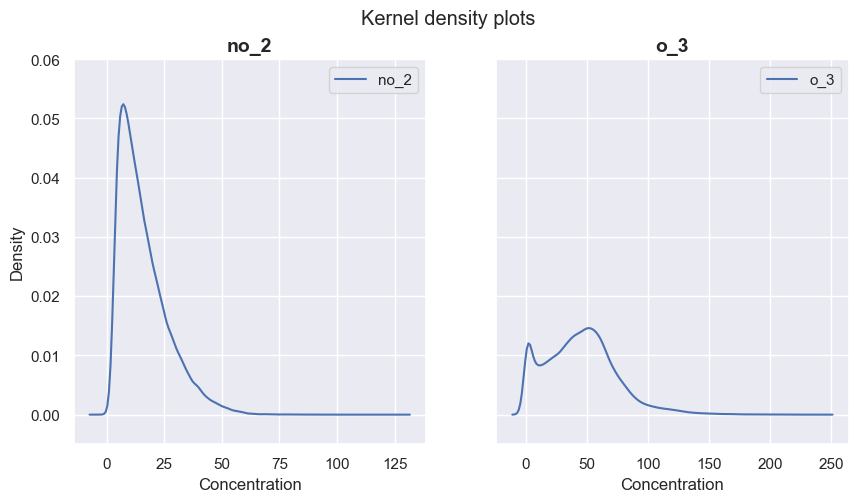

In [16]:
#// BEGIN_TODO [EDA_summary_stats] (5 points)

fig, ax = plt.subplots(ncols = 2, nrows = 1, sharey=True)

sns.kdeplot(df_data['no_2'], ax=ax[0])
sns.kdeplot(df_data['o_3'], ax=ax[1])

ax[0].set_xlabel('Concentration')
ax[1].set_xlabel('Concentration')
ax[0].set_title("no_2", size = 14, weight='bold')
ax[1].set_title("o_3", size = 14, weight='bold')
ax[0].set_ylim(-0.005, 0.06)
ax[0].legend(['no_2'])
ax[1].legend(['o_3'])

fig.suptitle("Kernel density plots")

# TODO
observations_descriptive_statistics = '''
For no_2 we expect the distribution to be left-skewed since the median is 13.42 while the mean is 16.1 so there are more values
to the right of the mean. The distribution for o_3, however, might be almost symmetric since both the mean and the median are aroudn 44'''
compound1_shape = 'right-skewed'
compound2_shape = 'right-skewed' # slightly
df_data[[compound1, compound2]].describe()

#// END_TODO [EDA_summary_stats] (5 points)



#### Task 2. Create line plots

To get an idea of how the concentration of each of the two compounds changes over time, create a line plot for each of them with time on the $x$-axis and the concentration on the $y$-axis. 
Additionally, create a line plot for your chosen weather factor, again with the time on the $x$-axis and its corresponding unit on the $y$-axis. 
Display the whole time period for the two air compounds and the weather factor.  
The 3 (sub)plots should be separate, so **not** superimposed. Optionally, they can be stacked with a shared $x$-axis.

Take some time to analyze the resulting figure.
Do you think the air compound concentrations are following **seasonal patterns** based on the plots?
Or could these fluctuations perhaps be related to **daily patterns**?
Store your observations as a string in the variable `observations_patterns`.

/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

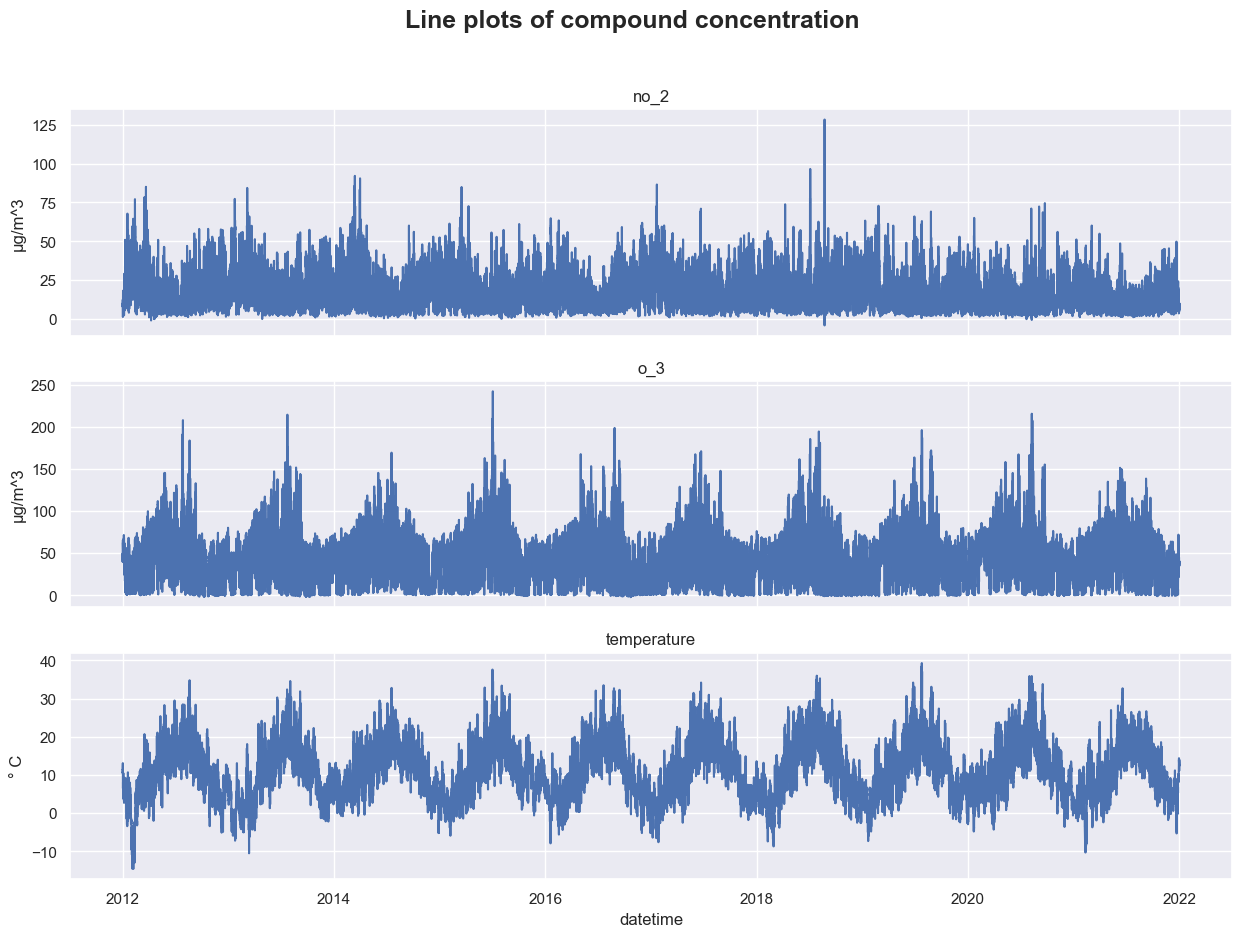

In [17]:
#// BEGIN_TODO [EDA_seasonal_patterns] (4 points)

fig, ax = plt.subplots(ncols=1,nrows=3, figsize=(15,10), sharex=True)

sns.lineplot(data=df_data, x='datetime', y=compound1, ax=ax[0])
sns.lineplot(data=df_data, x='datetime', y=compound2, ax=ax[1])
sns.lineplot(data=df_data, x='datetime', y=chosen_weather_factor, ax=ax[2])

#Titles
fig.suptitle('Line plots of compound concentration', size=18, weight='bold')
ax[0].set_title(compound1)
ax[1].set_title(compound2)
ax[2].set_title(chosen_weather_factor)

#y-labels
c_unit = '\u03bcg/m^3'
w_unit = '\u00B0 C'
ax[0].set_ylabel(c_unit)
ax[1].set_ylabel(c_unit)
ax[2].set_ylabel(w_unit)

# ax[2,0].set_xlim(pd.to_datetime("2016"), pd.to_datetime("2020"))

observations_patterns = 'We see that after a peak in no_2 there is a peak in o_3, then consentration of no_2 drops following with consentration of o_3. Temerature show simmilary patterns as o_3. So we see an anual pattern of the compounds\' consentration'


In [18]:
#// END_TODO [EDA_seasonal_patterns]

#### Task 3. Compute and compare z-scores

The plots created in the previous task are not well-readable because of frequently fluctuating data values.
We now want to restrict the $x$-axis to January 2019 to be able to see more clearly how the values change. 
In order to compare the trends, we will plot the lines together in one figure. 
Plotting the values as they are might not be helpful because of the scale difference. 
We will use z-scores to unify the scales and keep the plots interpretable. 
To achieve this, proceed as follows:

1. Add the columns `compound1_z_score`, `compound2_z_score`, and `weather_factor_z_score` to `df_data`. These columns should contain the **z-scores** of the measurements for your two compounds and your chosen weather factor, respectively.

1. Create a line plot with three lines representing the z-scores (two coming from the compounds and one from the weather factor) over January 2019 (plot the data for the whole month). Make sure to add an appropriate legend to the plot. What do you think about the readability of the plot?

1. Now, create a new figure that has three subplots for January 2019 with a pairwise comparison of the z-scores of the two compounds and the weather factor. Each subplot should be a line plot with two lines representing the z-scores of a pair, with one subplot for each pair of variables (i.e., `compound1_z_score` with `compound2_z_score`, `compound1_z_score` with `weather_factor_z_score` and `compound2_z_score` with `weather_factor_z_score`).

What do you observe when comparing the z-scores? Assign your observations as a string to the variable `observations_z_score`.

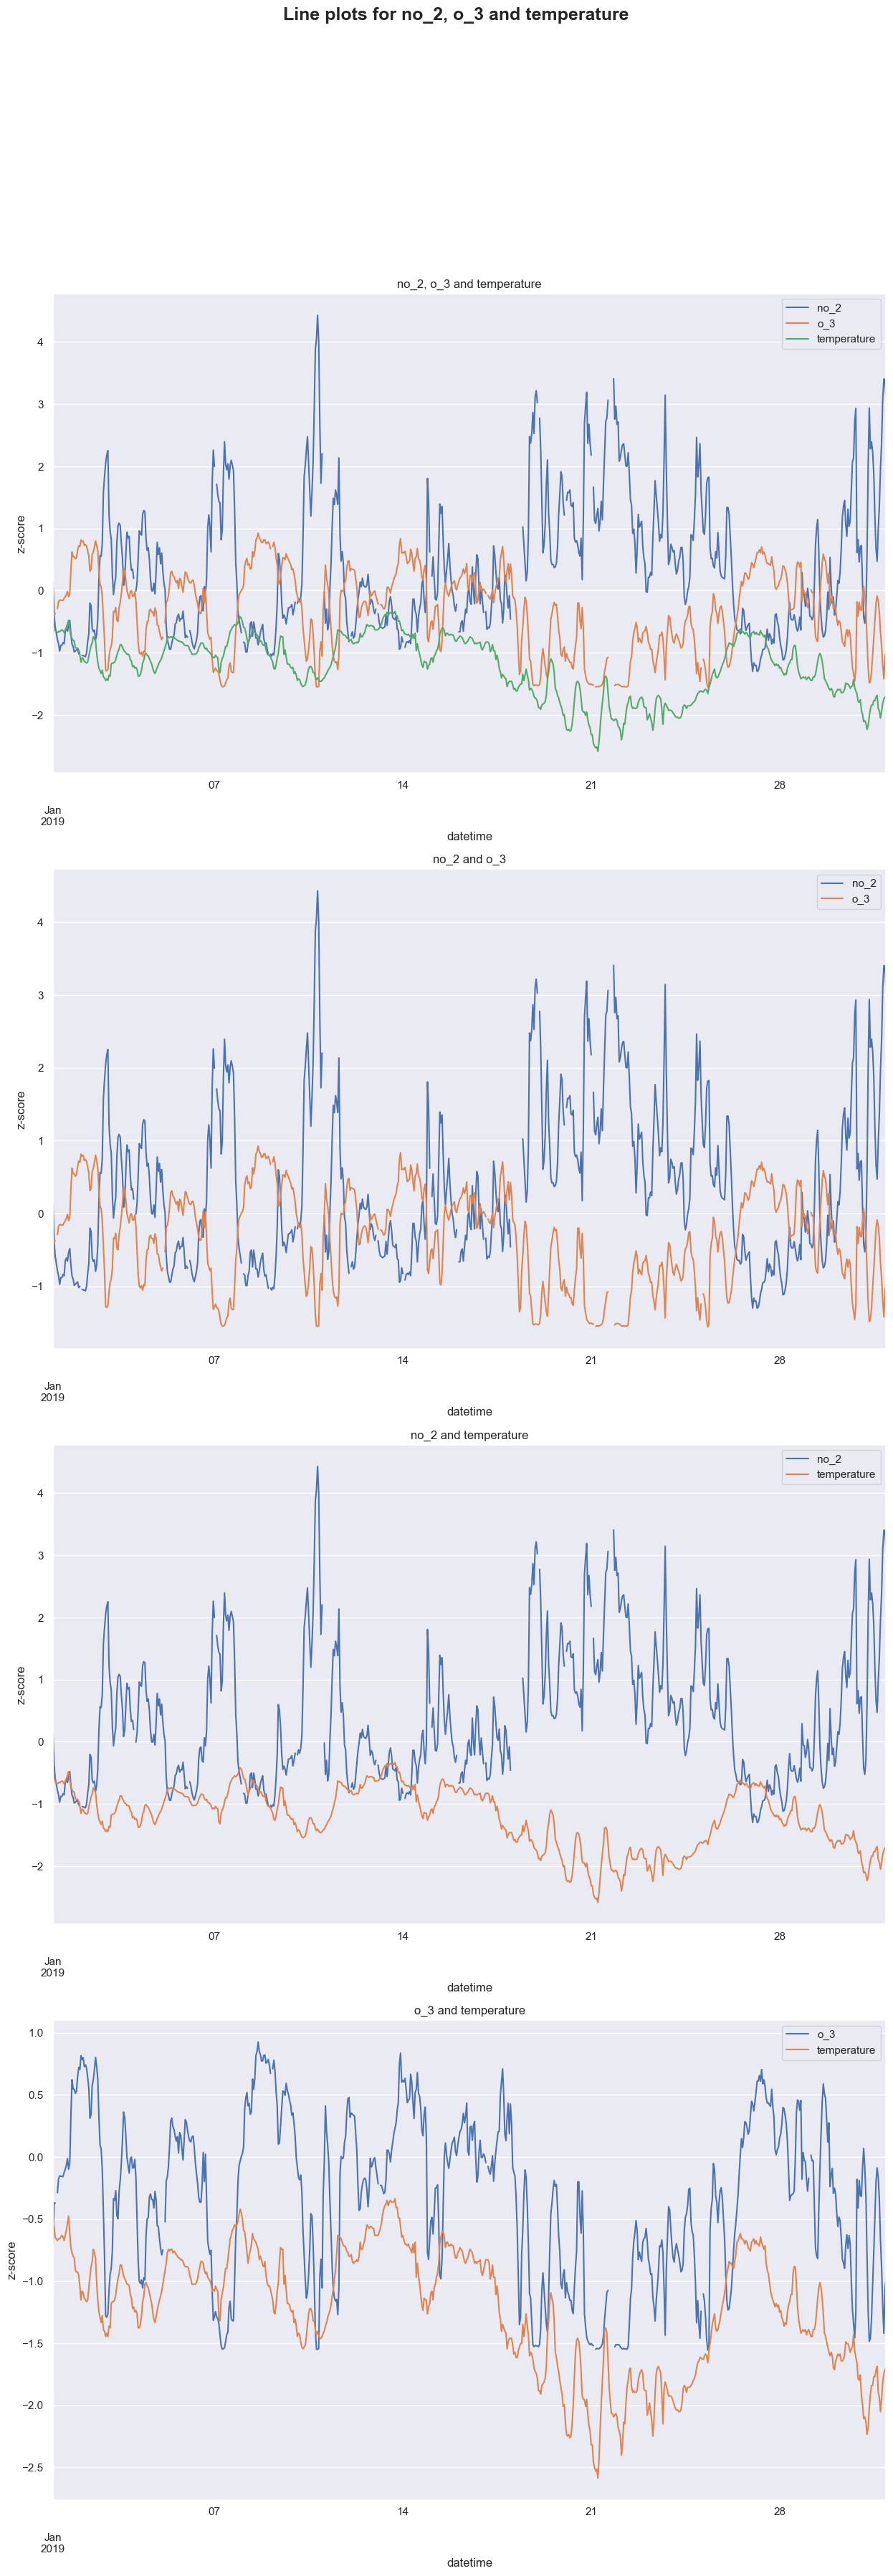

In [19]:
#// BEGIN_TODO [EDA_z_scores] (5 points)

df_data['compound1_z_score'] = (df_data[compound1] - df_data[compound1].mean()) / df_data[compound1].std()
df_data['compound2_z_score'] = (df_data[compound2] - df_data[compound2].mean()) / df_data[compound2].std()
df_data['weather_factor_z_score'] = (df_data[chosen_weather_factor] - df_data[chosen_weather_factor].mean()) / df_data[chosen_weather_factor].std()

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(15,40))
fig.suptitle(f"Line plots for {compound1}, {compound2} and {chosen_weather_factor}", size=18, weight='bold')

df_data[pd.to_datetime("2019-01-01 00:00:00+01:00"): pd.to_datetime("2019-01-31 23:00:00+01:00")]['compound1_z_score'].plot(ax=ax[0])#sns.lineplot(data=df_data, x='datetime', y=('compound1_z_score'))
df_data[pd.to_datetime("2019-01-01 00:00:00+01:00"): pd.to_datetime("2019-01-31 23:00:00+01:00")]['compound2_z_score'].plot(ax=ax[0])
df_data[pd.to_datetime("2019-01-01 00:00:00+01:00"): pd.to_datetime("2019-01-31 23:00:00+01:00")]['weather_factor_z_score'].plot(ax=ax[0])
ax[0].set_title(f"{compound1}, {compound2} and {chosen_weather_factor}")
ax[0].legend([compound1, compound2, chosen_weather_factor])
ax[0].set_ylabel('z-score')

df_data[pd.to_datetime("2019-01-01 00:00:00+01:00"): pd.to_datetime("2019-01-31 23:00:00+01:00")]['compound1_z_score'].plot(ax=ax[1])
df_data[pd.to_datetime("2019-01-01 00:00:00+01:00"): pd.to_datetime("2019-01-31 23:00:00+01:00")]['compound2_z_score'].plot(ax=ax[1])
ax[1].legend([compound1, compound2])
ax[1].set_ylabel('z-score')
ax[1].set_title(f"{compound1} and {compound2}")

df_data[pd.to_datetime("2019-01-01 00:00:00+01:00"): pd.to_datetime("2019-01-31 23:00:00+01:00")]['compound1_z_score'].plot(ax=ax[2])
df_data[pd.to_datetime("2019-01-01 00:00:00+01:00"): pd.to_datetime("2019-01-31 23:00:00+01:00")]['weather_factor_z_score'].plot(ax=ax[2])
ax[2].set_title(f"{compound1} and {chosen_weather_factor}")
ax[2].legend([compound1, chosen_weather_factor])
ax[2].set_ylabel('z-score')


df_data[pd.to_datetime("2019-01-01 00:00:00+01:00"): pd.to_datetime("2019-01-31 23:00:00+01:00")]['compound2_z_score'].plot(ax=ax[3])
df_data[pd.to_datetime("2019-01-01 00:00:00+01:00"): pd.to_datetime("2019-01-31 23:00:00+01:00")]['weather_factor_z_score'].plot(ax=ax[3])
ax[3].set_title(f"{compound2} and {chosen_weather_factor}")
ax[3].legend([compound2, chosen_weather_factor])
ax[3].set_ylabel('z-score')


observations_z_score='''
It does appear that no_2 has negative corrolations
with o_3 and the temperature while o_3 and the temperature have a positive corrolation
'''

In [20]:
#// END_TODO [EDA_z_scores]

#### Lesson on Aggregation
While the restriction of the time interval increased the legibility of the plots above, it reduced their scope to just one month. 
Throughout the next few tasks, you will use daily, weekly, or monthly averages to explore the air quality and weather data over a longer time interval while keeping the plots readable. 
Choosing which time period is more relevant for answering the coming questions is up to you, with the choice restricted to `day_of_year`, `week`, or `month`.

#### Task 4. Create aggregated data frames

To prepare for the next few tasks, create the data frames `df_data_daily`, `df_data_weekly`, and `df_data_monthly`. These new data frames should contain averages of the entries of `df_data` over `day_of_year`, `week`, and `month`, respectively. To be precise:
* These data frames should have a `MultiIndex` with two levels: `year` on the outer level, and either `day_of_year`, `week`, or `month` as the inner level (corresponding to the name of the data frame).
* These data frames should have the same column names as `df_data` (although you may omit the datetime related ones), but now the entries of these columns should be averages (over the time periods in the index).

> **Note:** Use the columns `day_of_year`, `week`, `month`, and `year` that are already present in `df_data`. You should not compute these yourself.[<sup>1</sup>](#fn1)

In [21]:
#// BEGIN_TODO [EDA_aggregation] (4 points)
df_data_daily = df_data.groupby(['year','day_of_year']).agg('mean')
df_data_weekly = df_data.groupby(['year','week']).agg('mean')
df_data_monthly = df_data.groupby(['year','month']).agg('mean')

In [22]:
#// END_TODO [EDA_aggregation]

#### Task 5. Identify data variation per year

We are interested in studying whether the data varies significantly between the years, or whether it follows a repeating pattern. 

1. For each compound and your chosen weather factor separately, superimpose 5 line plots. 
Each line plot should show the averaged values (**not** z-scores) over one year. 
These five years should be the last 5 years for which data is available. 
You should choose which aggregation level to use from `day`, `week`, or `month`.  
To be precise, you should create 3 (sub)plots (corresponding to `compound1`, `compound2`, and `chosen_weather_factor`) each containing 5 lines (corresponding to the 5 years). Optionally, you can share the $x$-axis between these 3 plots.

1. For another perspective on possible seasonal patterns, also create three separate visualizations for each compound and the weather factor using box plots. 
The box plots should show the distribution of the original **non-averaged** values grouped by `month` over all available data (so use `df_data` for this).

What is the message that each of the visualizations conveys? What insights can you get? 
Do you find the visualization with superimposed lines from subtask 1 or the separate visualizations from subtask 2 more useful, and why so?
Assign your observations as a string to the variable `observations_seasonal_plots`.

/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

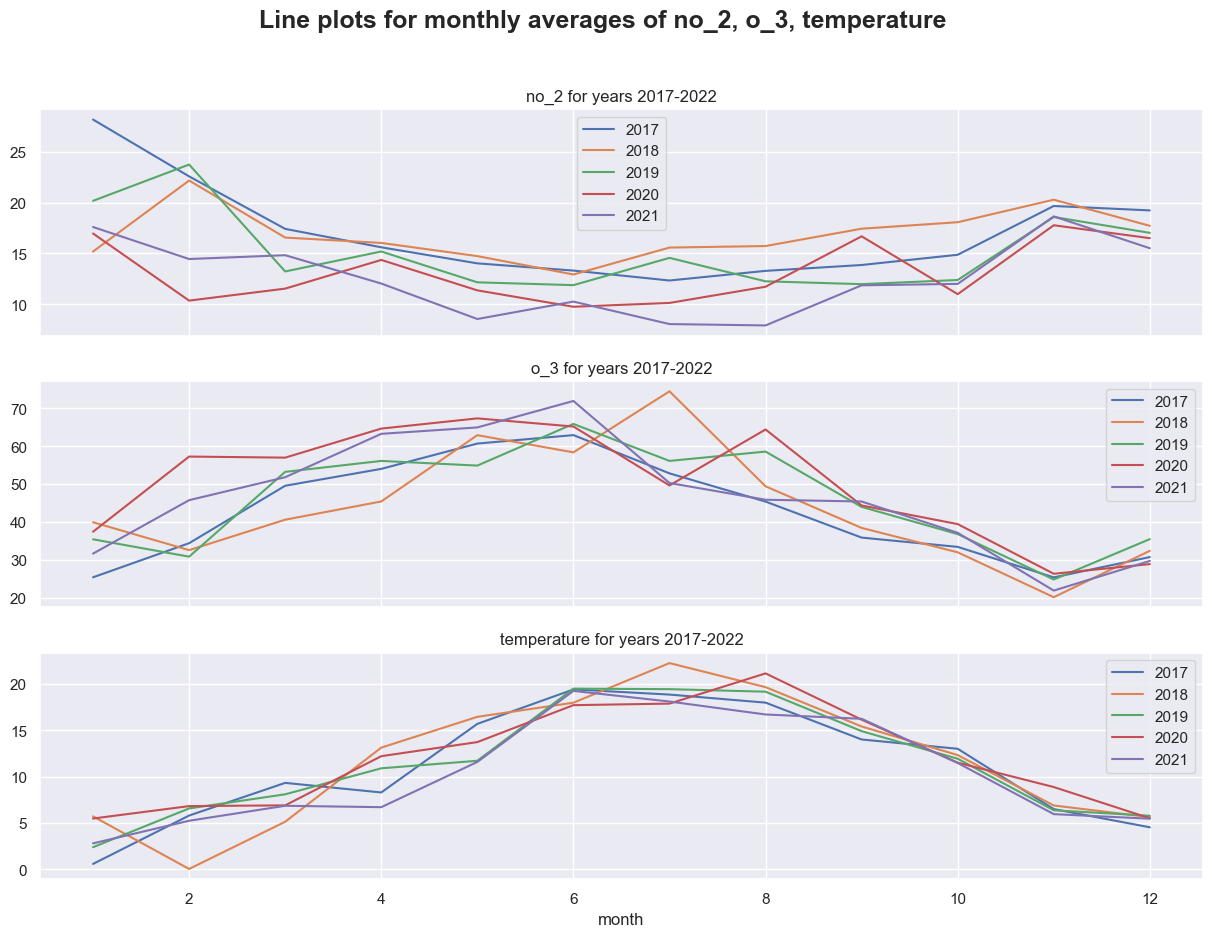

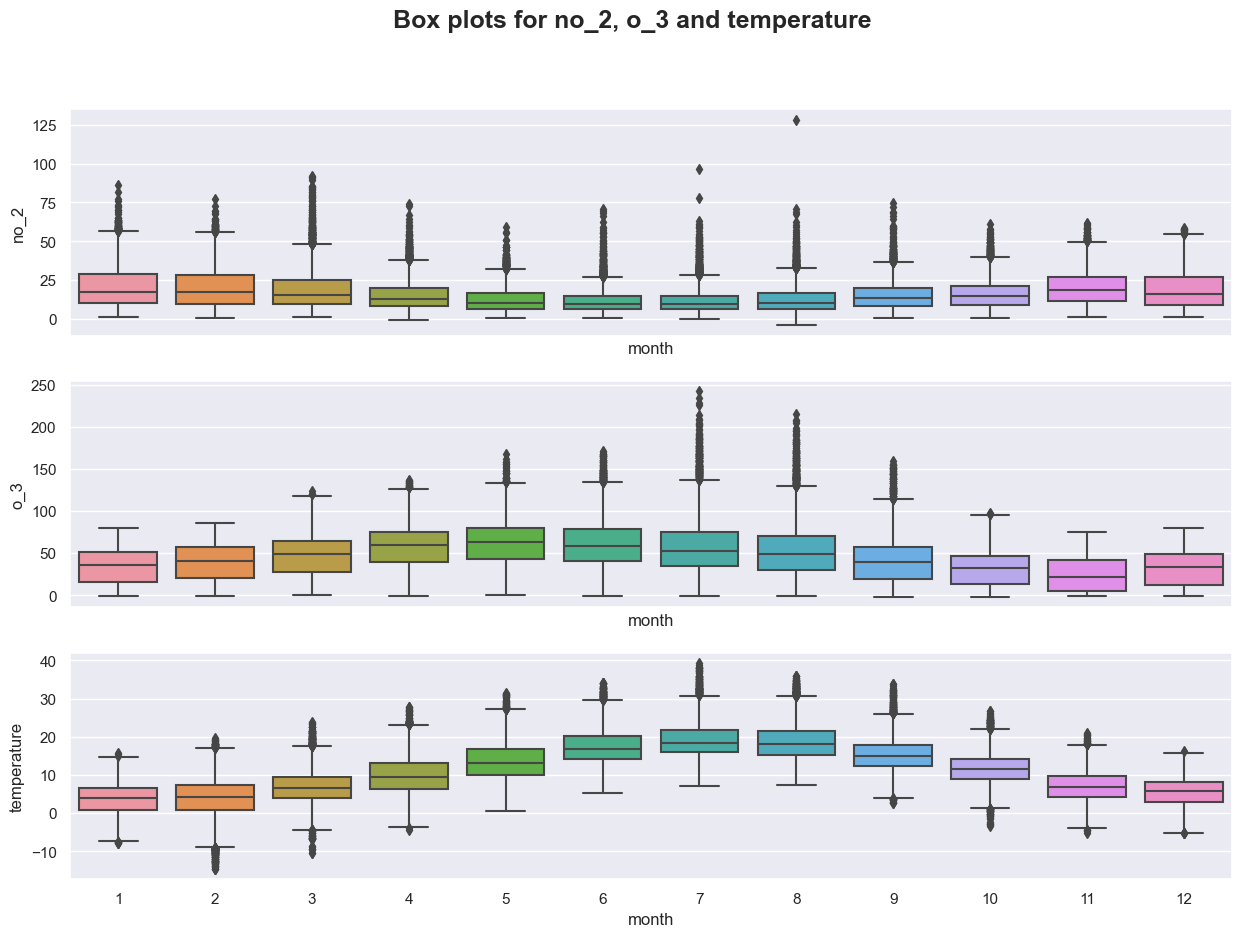

In [23]:
#// BEGIN_TODO [EDA_variation] (6 points)
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(15,10), sharex=True)
fig.suptitle(f'Line plots for monthly averages of {compound1}, {compound2}, {chosen_weather_factor}', size=18, weight='bold')
# for compound 1
legend = []
for i in range(2017, 2022):
    df_data_monthly.loc[i][compound1].plot(ax=ax[0])
    legend.append(i)
ax[0].legend(legend)
ax[0].set_title(f'{compound1} for years 2017-2022')

# for compound 2
legend = []
for i in range(2017, 2022):
    df_data_monthly.loc[i][compound2].plot(ax=ax[1])
    legend.append(i)
ax[1].legend(legend)
ax[1].set_title(f'{compound2} for years 2017-2022')

# for weather factor
legend = []
for i in range(2017, 2022):
    df_data_monthly.loc[i][chosen_weather_factor].plot(ax=ax[2])
    legend.append(i)
ax[2].legend(legend)
ax[2].set_title(f'{chosen_weather_factor} for years 2017-2022')

fig_box, box = plt.subplots(ncols=1,nrows=3,figsize=(15,10), sharex=True)
fig_box.suptitle(f"Box plots for {compound1}, {compound2} and {chosen_weather_factor}", size=18, weight='bold')
box[0] = sns.boxplot(data=df_data,x='month', y=compound1, ax=box[0])
box[1] = sns.boxplot(data=df_data,x='month', y=compound2, ax=box[1])
box[2] = sns.boxplot(data=df_data,x='month', y=chosen_weather_factor, ax=box[2])

observations_seasonal_plots = '''
We see that there is a annual pattern for all three graphs and we see a peak in the 
during june and july for both temperature and o_3, however, a dip of no_2 during the same period.
'''

In [24]:
#// END_TODO [EDA_variation]

#### Task 6. Visualize the relationship between air compounds and the weather factor
To compare the concentrations of the compounds to the measurements of the weather factor without taking into account the time dimension, create a scatter plot and a heatmap for each compound separately with the weather factor on the horizontal axis (so 2 scatter plots and 2 heatmaps in total). 
For the heatmap, you should create appropriate bins for the data for which this is necessary (using for instance the `pd.cut` method).


Discuss which visualization, the scatter plot or the heatmap, is better suited for this comparison in the variable `observations_scatterplot_vs_heatmap`.

/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

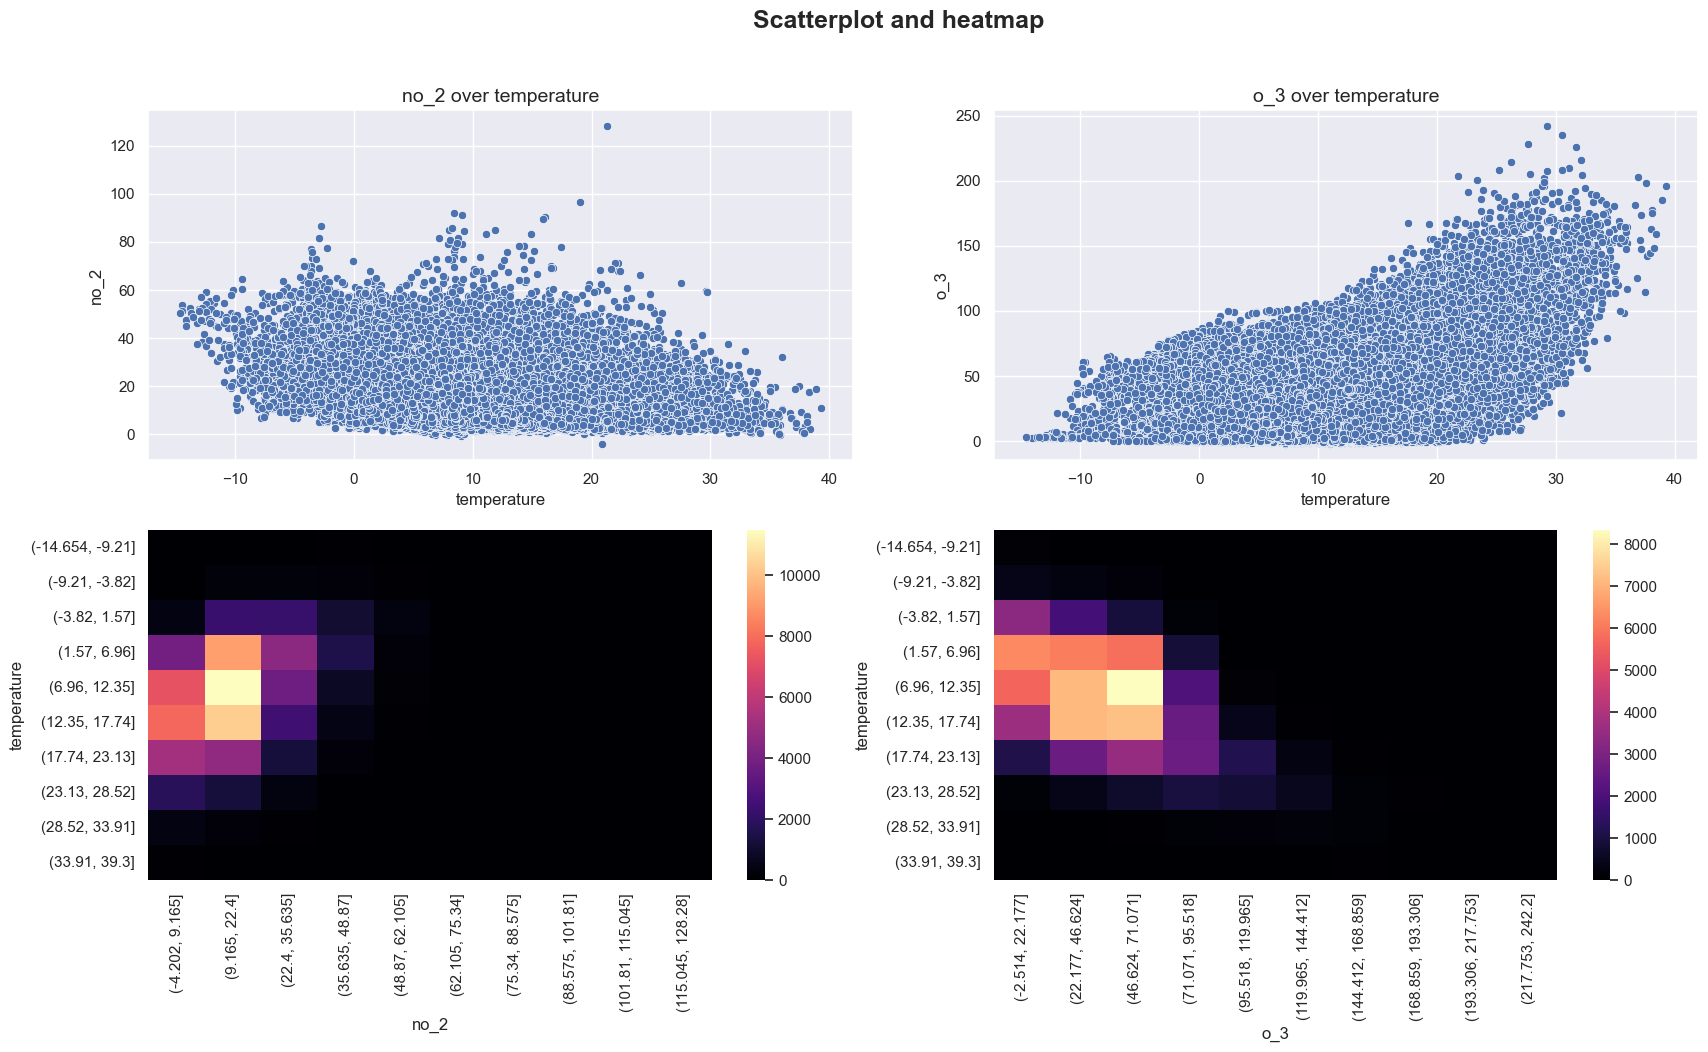

In [25]:
#// BEGIN_TODO [EDA_relationship] (5 points)
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
fig.suptitle('Scatterplot and heatmap', size=18, weight='bold')

sns.scatterplot(data=df_data, x=chosen_weather_factor, y=compound1,ax=ax[0,0])
sns.scatterplot(data=df_data, x=chosen_weather_factor, y=compound2,ax=ax[0,1])
ax[0,0].set_title(f'{compound1} over {chosen_weather_factor}', size=14)
ax[0,1].set_title(f'{compound2} over {chosen_weather_factor}', size=14)

df_data['weather_factor_bins'] = pd.cut(df_data[chosen_weather_factor], bins=10)
df_data['compound1_bins'] = pd.cut(df_data[compound1], bins = 10)
df_data['compound2_bins'] = pd.cut(df_data[compound2], bins = 10)

compound1_matrix = df_data.pivot_table(index='weather_factor_bins', columns='compound1_bins', values=chosen_weather_factor, aggfunc='count')
compound2_matrix = df_data.pivot_table(index='weather_factor_bins', columns='compound2_bins', values=chosen_weather_factor, aggfunc='count')

sns.heatmap(data=compound1_matrix, cmap='magma', ax=ax[1,0])
sns.heatmap(data=compound2_matrix, cmap='magma', ax=ax[1,1]) 
ax[1,0].set_xlabel(compound1)
ax[1,0].set_ylabel(chosen_weather_factor)
ax[1,1].set_xlabel(compound2)
ax[1,1].set_ylabel(chosen_weather_factor)

observations_scatterplot_vs_heatmap = 'the scatter plot is better for comparison as you can see much better the existance or non existance of correlation'

In [26]:
#// END_TODO [EDA_relationship]

#### Task 7. Bonus: Visualize wind impact on compound concentrations

> **Disclaimer:** If you solve this task correctly, you can earn at most 5 bonus points on the programming part of the graded assignment (out of 100 points total for the entire graded assignment, including the poster).

Certain kinds of air pollution originate from specific sources, such as factories or traffic. 
As air compounds are carried by the wind, it is possible that the direction and speed of the wind influence the concentration of either of your two compounds at your measurement station. 
We want to investigate whether such a relation exists.
To do so, we ask you to create two scatter plots (one for each compound) that show the mean concentration of the compound per wind vector. 
Here a wind vector is a combination of wind speed and wind direction, represented by the vector length and vector direction respectively.

To implement such a visualization, consider the following:
1. The wind data in `df_data` can be interpreted as a vector, with the `wind_speed` being the length and the `wind_direction` the angle from the northern direction.[<sup>2</sup>](#fn2) Such a vector can be represented as a line going from the origin point in a Cartesian coordinate system to a point $(x, y)$. To get the values of $x$ and $y$ based on the `wind_speed` and the `wind_direction`, use the following formulas, where $\theta$ equals the `wind_direction` converted to radians (you can use the already imported `radians` function for this, or the formula $\theta = \mathrm{wind\_direction} \times \frac{\pi}{180}$):  

    $x = \mathrm{wind\_speed} \times \sin(\theta)$  
    $y = \mathrm{wind\_speed} \times \cos(\theta)$  

1. Create two new columns in `df_data`, called `x_wind` and `y_wind`, and assign them the values of $x$ and $y$.

1. Compute the mean concentration of each compound for every (`wind_speed`, `wind_direction`) pair.

1. Create a visualization with two subplots, each containing a scatter plot that shows, using a colormap, the mean compound concentration for a given wind vector in the Cartesian plane. The location of the dots should be determined by the wind vector, and the color by the mean compound concentration for that wind vector (using a colormap). Figure 2 shows such a visualization for two air compounds for one of the air quality stations to give you an example of what your result could look like.

![wind_visualization](GA1_files/wind_visualization.png)
<figcaption style="text-align: center;"><b>Figure 2. Concentration means per wind vector of the air compounds o_3 and no_2 measured by the air quality station NL10644 in 2015.</b></figcaption>

<br/>

> **Notes:**
> * Set a sensible limit for the $x$- and the $y$-axis to improve readability.
> * You are allowed to import additional libraries for this task, but make sure they do not cause errors in Momotor.

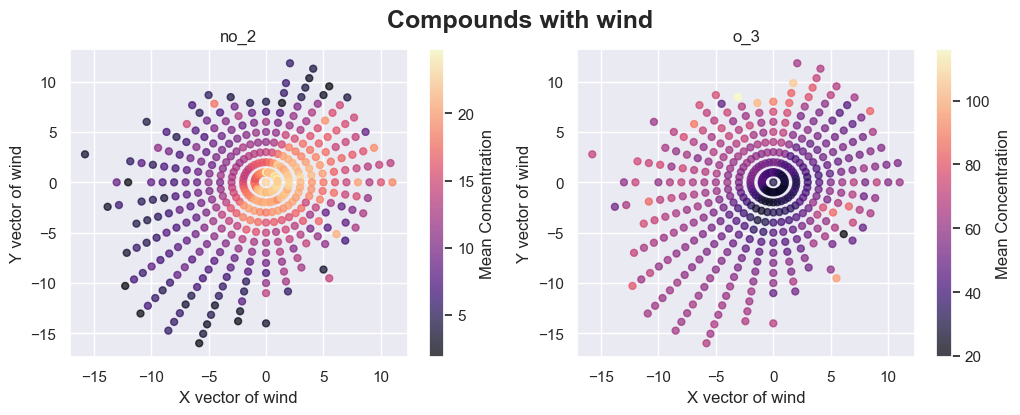

In [27]:
#// BEGIN_TODO [EDA_wind_impact] (5 points)

df_data['wind_direction_radians'] = df_data['wind_direction'] * (np.pi / 180)
df_data['x_wind'] = df_data['wind_speed'] * np.sin(df_data['wind_direction_radians'])
df_data['y_wind'] = df_data['wind_speed'] * np.cos(df_data['wind_direction_radians'])

mean_concentration_compound1 = df_data.groupby(['x_wind', 'y_wind'])[compound1].mean().reset_index()
mean_concentration_compound2 = df_data.groupby(['x_wind', 'y_wind'])[compound2].mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

c1 = ax[0].scatter(mean_concentration_compound1['x_wind'], mean_concentration_compound1['y_wind'], c=mean_concentration_compound1[compound1], cmap='magma', s=25, alpha=0.7)
c2 = ax[1].scatter(mean_concentration_compound2['x_wind'], mean_concentration_compound2['y_wind'], c=mean_concentration_compound2[compound2], cmap='magma', s=25, alpha=0.7)
fig.colorbar(mappable=c1, ax=ax[0], label='Mean Concentration')
fig.colorbar(mappable=c2, ax=ax[1], label='Mean Concentration')
fig.suptitle('Compounds with wind', size=18, weight='bold')
ax[0].set_title(compound1)
ax[1].set_title(compound2)
ax[0].set_xlabel('X vector of wind')
ax[1].set_xlabel('X vector of wind')
ax[0].set_ylabel('Y vector of wind')
ax[1].set_ylabel('Y vector of wind');


In [28]:
#// END_TODO [EDA_wind_impact]

---

## Part 2

### Step 3. Predict the Air Quality

In this second part of the assignment, you are going to investigate to what extent the daily average of the air quality **at your personal air quality measurement station** can be predicted using weather data. How good of a model can you make?

However, before you create your prediction model, we need to get rid of the missing values of the air compounds and the weather factors extracted from the database. 
The code cell below gets rid of `NaN` ("Not a Number") values by using the `interpolate` method (see the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)).
The method uses, by default, a *linear* method that ignores the index and treats all values as equally spaced.
The `limit_direction` parameter specifies in which direction the linear method must be applied.
When set to `'both'` the interpolation will be applied both forward and backward.
Additionally, the `inplace` parameter states that values must be modified directly in the original data frame.

Do **not modify** the following code, and make sure you **execute** it before you continue.

In [29]:
COLUMNS_INTERPOLATE = [compound1, compound2] + WEATHER_FACTORS

for column in COLUMNS_INTERPOLATE:
    if column in df_data_daily.columns.values:
        df_data_daily[column].interpolate(limit_direction='both', inplace=True)

#### Task 1. Choose the model variables
The first stepping stone in creating a prediction model consists of choosing the variables involved in the prediction model.
To make this choice, use the results of the exploratory data analysis performed in Step 2. It could be useful to rerun Part 1 with different choices of `chosen_weather_factor`. Perform the following steps:

1. Choose one of your two air compounds to predict and assign its name to `chosen_compound`. This compound will be the dependent variable of your model.
1. Choose **at least two** weather factors that you think can be used to (effectively) predict the concentration of your chosen air compound. These weather factors will be the independent variables of your model.

    Store the names of your chosen weather factors in a list variable named `independent_vars`. Each name should be one of the values of the `WEATHER_FACTORS` list, typed in **exactly the same way as it is in this list**. Note that you are not required to include `chosen_weather_factor` in this list.

In [30]:
#// BEGIN_TODO [Predict_vars] (1 point)

chosen_compound = compound2
independent_vars = ['temperature', 'global_radiation', 'sunshine_duration']

In [31]:
#// END_TODO [Predict_vars]

#### Task 2. Split into training and test data
To create your prediction model you need to split the data into consecutive training and test data. This means that the test data should be measured entirely **after** the training data, which resembles how the model would be used in practice to predict the future. We want to use the daily averages of the data, so use the `df_data_daily` data frame (from which the `NaN` values were removed at the start of Step 3).

1. First, split the entire data frame into two data frames: assign the **training data** to the `df_train` data frame and the **test data** to the `df_test` data frame (do not drop any columns). For example, the training data could contain all data from 2018 and backwards, and the test data all data from 2019. Note that you do not have to use all of the data from the entire date range; however, both samples should be **sufficiently large**.

1. From these two data frames, extract the training and the test data of your independent and dependent variables, selecting only the relevant columns. The **data frames** for your **independent variables** must be stored in the variables `X_train` and `X_test`, while the **series** for your **dependent variable** must be stored in the variables `y_train` and `y_test`.[<sup>3</sup>](#fn3)

In both steps, it is good practice to make copies of the data frame excerpts you create. This prevents unintended modifications of the original data frame.

> **Notes:**
> * You should **not** use the `train_test_split` function. As we are dealing with time series data, the training and test data should be split consecutively as opposed to randomly (which is what `train_test_split` would do).
> * The COVID-19 pandemic might have had an impact on the data you are interacting with. That is, the data measured in the years before 2020 might not be representative of the data reported in 2020 and later years. Choose your training and test data wisely.

In [32]:
#// BEGIN_TODO [Predict_train_test] (5 points)
df_data_daily = df_data_daily[abs((df_data_daily['compound1_z_score'])<3) & (abs(df_data_daily['compound2_z_score'])<3) & (abs(df_data_daily['weather_factor_z_score'])<3)]
df_train = df_data_daily[:(2018,31)].copy()
df_test = df_data_daily[(2019,1):].copy()
X_train = df_train[independent_vars]
X_test = df_test[independent_vars]
y_train = df_train[chosen_compound]
y_test = df_test[chosen_compound]

In [33]:
#// END_TODO [Predict_train_test]

#### Task 3. Create your prediction model
Now that the model variables have been chosen and the data has been divided, it is time to create the model itself. You can opt for creating a model that predicts the concentration of your chosen compound (cf. Actual value prediction), or a model that predicts whether this concentration is larger than some threshold value (cf. Threshold prediction).
Define the variable `prediction_type` that stores the string `"actual value"` if you choose the former option, or stores the string `"threshold"` if you opt for the latter option. 
Based on your choice, follow **only one of the task paths** described below.

**Actual value prediction**

1. Create a **linear regression** model that predicts the daily average concentration of `chosen_compound` using `independent_vars`. Store the *linear regression* object in a variable called `model`.

1. Create (at least) two **residual plots** to visualize your model's performance on both the training and the test data. You may choose which independent variable to use on the $x$-axis. One of the two plots should use the training data and the other one should use the test data.

1. To evaluate the performance of your model quantitatively, compute the **mean absolute error** of its predictions on the **test data**, and store the result in the variable `evaluation`.

1. What do you observe? Write a summary of your observations and store it as a string in the variable `observations_predictions`.


**Threshold prediction**

1. Choose an appropriate threshold for the daily average concentration of `chosen_compound`. Your model will predict whether or not this threshold is exceeded on a given day. It may be useful to consult the summary statistics and/or the kernel density plots you created in Step 2, Task 1. (But keep in mind that those were computed with the unaveraged data.) Assign this threshold to the variable `chosen_compound_threshold`.

1. As you are predicting whether this threshold is exceeded, your dependent variable should be boolean. Create boolean series `y_train_mask` and `y_test_mask` that indicate, for every day, whether or not `chosen_compound_threshold` is **strictly** exceeded in `y_train` and `y_test` respectively.

1. Create a **decision tree** model that predicts whether the daily average concentration of `chosen_compound` is larger than your threshold value. Store the *decision tree object* in a variable called `model`. Set an appropriate maximum depth for the tree.

1. Compute and print the two **confusion matrices**, one for the training and one for the test data.

1. To evaluate the performance of your model quantitatively, store the **accuracy** of its predictions (the fraction of correct predictions) on the **test data** in the variable `evaluation`.

1. What do you observe? Write a summary of your observations and store it as a string in the variable `observations_predictions`.

/home/chachi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/chachi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


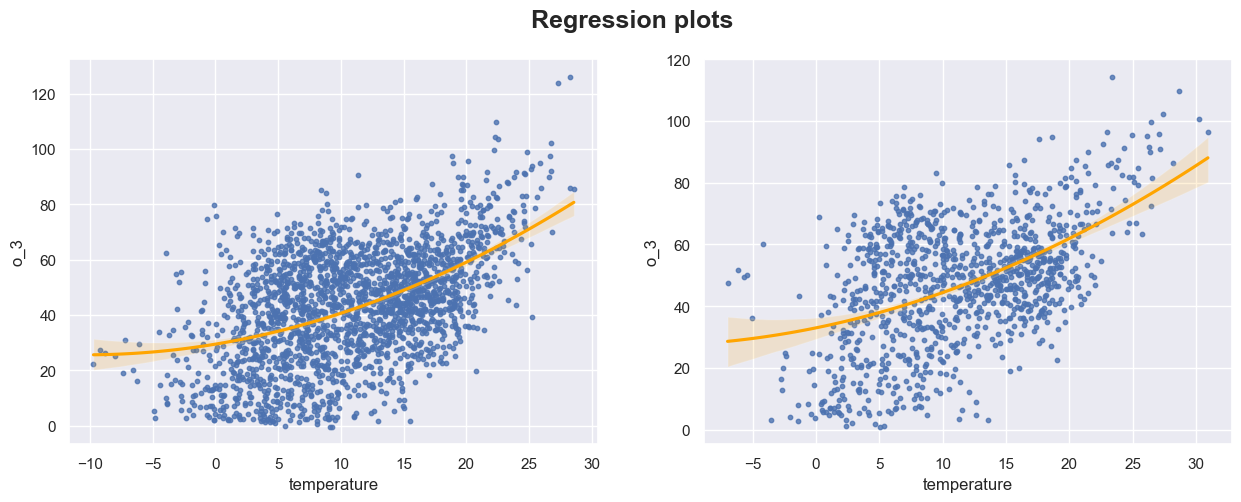

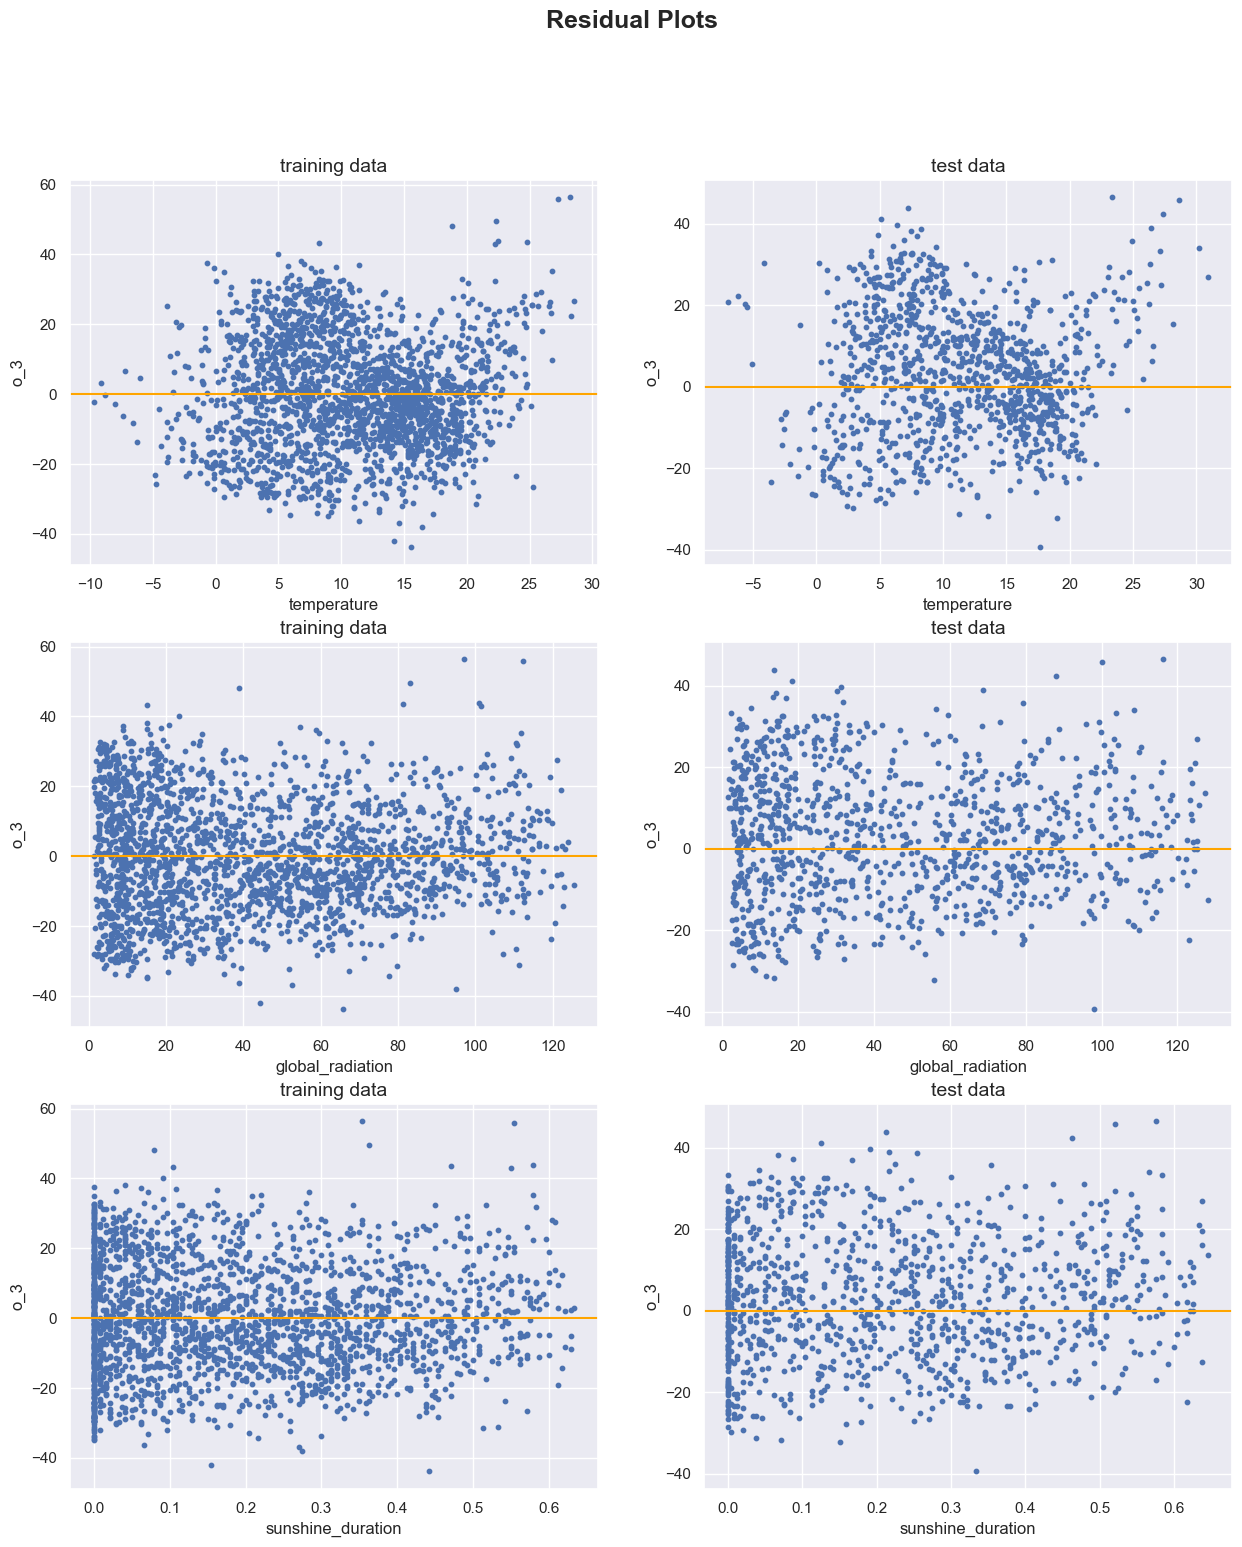

In [34]:
#// BEGIN_TODO [Predict_model] (10 points)

prediction_type = 'actual value'
model = LinearRegression()
model.fit(X_train.values, y_train)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
fig.suptitle('Regression plots', size=18, weight='bold')
sns.regplot(x=X_train['temperature'], y=y_train,order=2, line_kws={'color':'orange'}, scatter_kws={'s':10}, ax=ax[0])
ax[0]
sns.regplot(x=X_test['temperature'], y=y_test,order=2, line_kws={'color':'orange'}, scatter_kws={'s':10}, ax=ax[1])

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,17))
fig.suptitle("Residual Plots", size=18, weight='bold')
ax[0,0].scatter(x=X_train['temperature'], y=(y_train - model.predict(X_train.values)) , s=10)
ax[0,0].axhline(color='orange')
ax[0,0].set_title('training data', size=14)
ax[0,0].set_xlabel('temperature')
ax[0,0].set_ylabel(chosen_compound)

ax[0,1].scatter(x=X_test['temperature'], y=(y_test - model.predict(X_test.values)) , s=10)
ax[0,1].axhline(color='orange')
ax[0,1].set_title('test data', size=14)
ax[0,1].set_xlabel('temperature')
ax[0,1].set_ylabel(chosen_compound)

ax[1,0].scatter(x=X_train['global_radiation'], y=(y_train - model.predict(X_train.values)) , s=10)
ax[1,0].axhline(color='orange')
ax[1,0].set_title('training data', size=14)
ax[1,0].set_xlabel('global_radiation')
ax[1,0].set_ylabel(chosen_compound)

ax[1,1].scatter(x=X_test['global_radiation'], y=(y_test - model.predict(X_test.values)) , s=10)
ax[1,1].axhline(color='orange')
ax[1,1].set_title('test data', size=14)
ax[1,1].set_xlabel('global_radiation')
ax[1,1].set_ylabel(chosen_compound)

ax[2,0].scatter(x=X_train['sunshine_duration'], y=(y_train - model.predict(X_train.values)) , s=10)
ax[2,0].axhline(color='orange')
ax[2,0].set_title('training data', size=14)
ax[2,0].set_xlabel('sunshine_duration')
ax[2,0].set_ylabel(chosen_compound)

ax[2,1].scatter(x=X_test['sunshine_duration'], y=(y_test - model.predict(X_test.values)) , s=10)
ax[2,1].axhline(color='orange')
ax[2,1].set_title('test data', size=14)
ax[2,1].set_xlabel('sunshine_duration')
ax[2,1].set_ylabel(chosen_compound)

evaluation = mean_absolute_error(y_test.values, model.predict(X_test.values))

observations_predictions = 'There is no high accuracy for the linear regression model.'

In [35]:
#// END_TODO [Predict_model]

---

## Part 3

### Step 4. Concluding Hypothesis

What is the most important takeaway message concerning the relationship between air compounds and weather factors based on the analysis in the notebook? 
The purpose of this assignment was to explore the data at hand.
Based on your discoveries, you can now formulate a hypothesis that indicates a direction for further investigation. 
Formulate your hypothesis in one sentence, and store it as a string in a variable named `hypothesis`.

Use this hypothesis as the basis for the conclusion of your poster. 
Moreover, make sure that you include supporting empirical evidence for your hypothesis in your poster. 
This evidence could come from the first two parts of this assignment, i.e., both from the EDA part and the part in which you predicted the chosen air compound based on weather data.

Note that the hypothesis may be negative, for instance, that there is no relationship between the chosen air compound and the analyzed weather factor(s).

In [36]:
#// BEGIN_TODO [Hypothesis] (1 point)

hypothesis = '''
Long periods of high temperatures result in elevated concentrations of ground level ozone.
'''

In [37]:
#// END_TODO [Hypothesis]

### Step 5. Create Your Poster

Finally, create a poster on which you present and discuss your results. 
To this aim, you **must use the template of the poster available on Canvas**.
There, you can also find more information on how to create your poster.
We encourage you to use the space below to create extra visualizations and possibly perform extra computations for your poster.
For example, you can:
- Compare the concentrations of your two compounds against the chosen factor using z-scores for a **different month and year** (see Step 2 - Task 3).
- Use a **different aggregation level or visualization** to identify **seasonal patterns** (see Step 2 - Task 5).
- Identify the correlation between the concentration of the air compounds and a **different weather factor** (see Step 2 - Task 6).
- Come up with a **new analysis** that you find relevant and interesting!


<div class="alert alert-block alert-danger">
Also:
    <ol>
        <li>Include supporting empirical evidence for choosing your hypothesis in your poster.</li>
        <li><b>Ensure the visualizations that you include in your poster, are also produced by your notebook.</b>
        </li> Note that the visualizations displayed on Momotor might differ from the ones produced on your computer! This is due to the use of a testing database. After the deadline the full database will be used, so at that point the visualizations should be the same.
        <li>Double-check if the visualizations are produced correctly on Momotor under the <b>Running submitted notebook</b> tab.</li>
    </ol>
</div>

> **Note:** You are allowed to import additional libraries for this task, but make sure they do not cause errors in Momotor.

/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chachi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

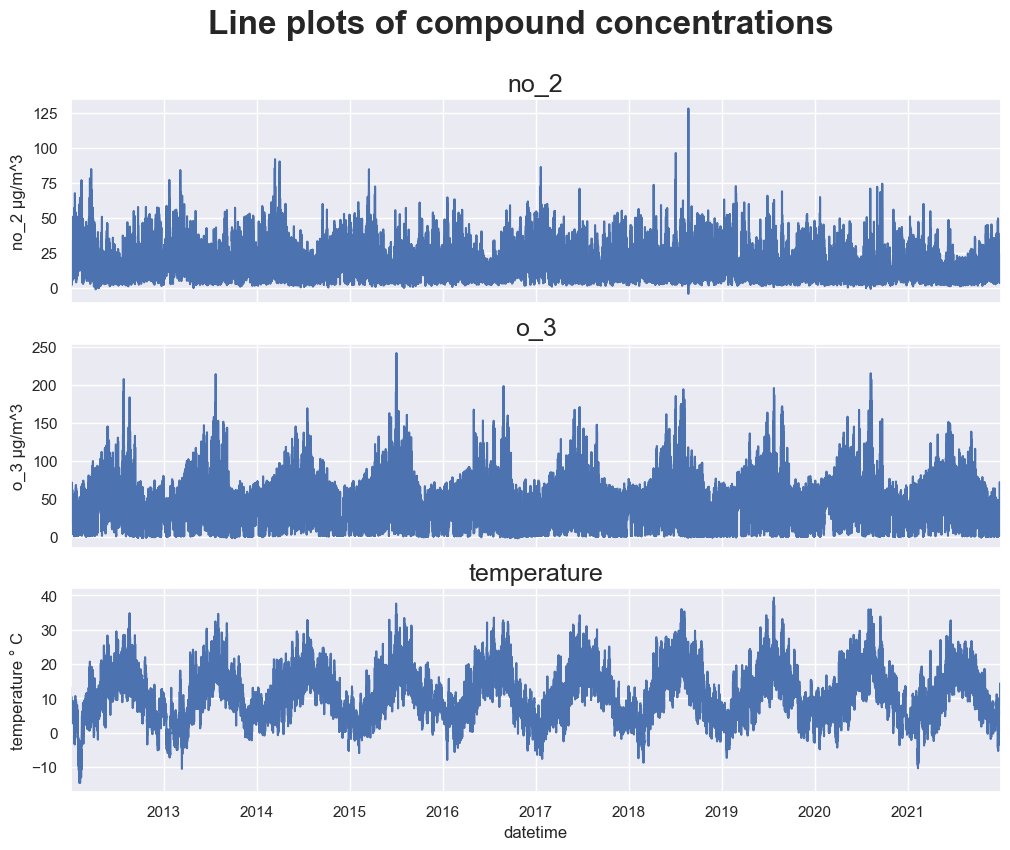

In [38]:
#// BEGIN_TODO [Poster]

fig, ax = plt.subplots(ncols=1,nrows=3, figsize=(12,9), sharex=True)

sns.lineplot(data=df_data, x='datetime', y=compound1, ax=ax[0])
sns.lineplot(data=df_data, x='datetime', y=compound2, ax=ax[1])
sns.lineplot(data=df_data, x='datetime', y=chosen_weather_factor, ax=ax[2])

# sns.kdeplot(df_data, x="datetime", y=compound1)
# sns.kdeplot(df_data, x='datetime', y=compound1)
# sns.kdeplot(df_data, x='datetime', y=chosen_weather_factor)

# #Titles
fig.suptitle('Line plots of compound concentrations', size=24, weight='bold')
ax[0].set_title(compound1, size=18)
ax[1].set_title(compound2, size=18)
ax[2].set_title(chosen_weather_factor, size=18)

# #y-labels
c_unit = '\u03bcg/m^3'
w_unit = '\u00B0 C'
ax[0].set_ylabel(f'{compound1} {c_unit}')
ax[1].set_ylabel(f'{compound2} {c_unit}')
ax[2].set_ylabel(f'{chosen_weather_factor} {w_unit}')
ax[2].set_xlim(start_measurement, end_measurement)

fig.savefig('distribution.png')

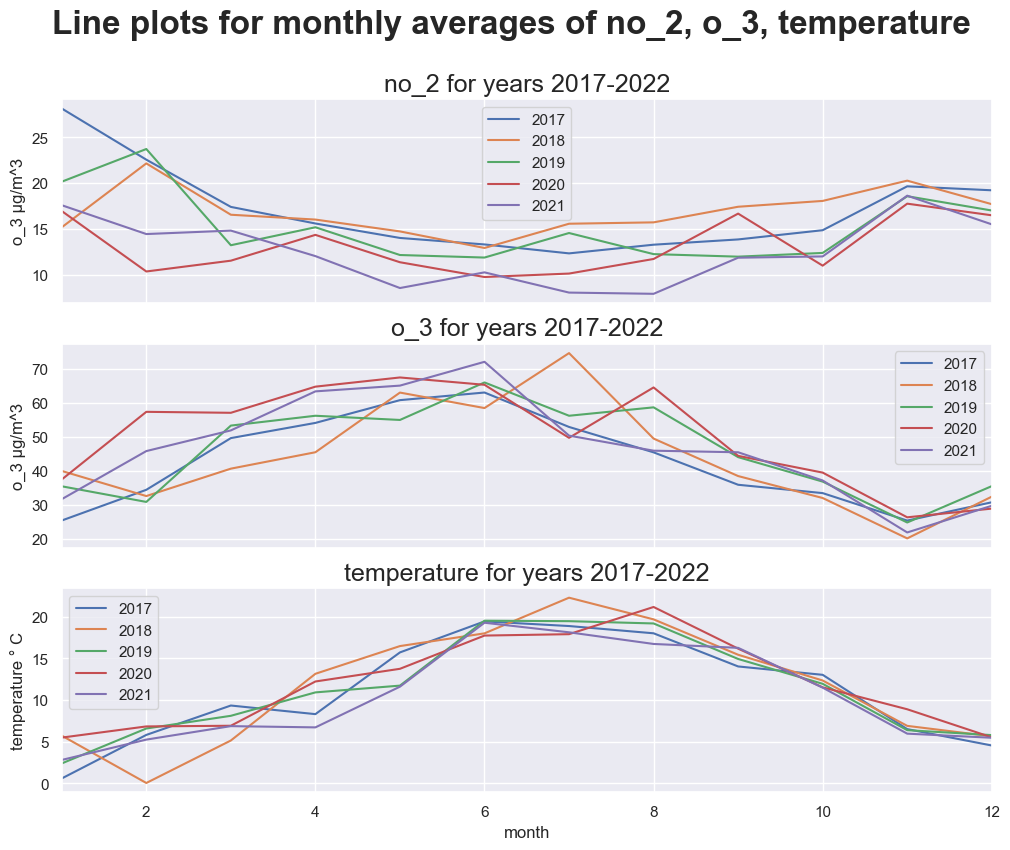

In [39]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(12,9), sharex=True)
fig.suptitle(f'Line plots for monthly averages of {compound1}, {compound2}, {chosen_weather_factor}', size=24, weight='bold')
# for compound 1
legend = []
for i in range(2017, 2022):
    df_data_monthly.loc[i][compound1].plot(ax=ax[0])
    legend.append(i)
ax[0].legend(legend)
ax[0].set_title(f'{compound1} for years 2017-2022', size=18)
ax[0].set_ylabel(f'{compound2} {c_unit}')

# for compound 2
legend = []
for i in range(2017, 2022):
    df_data_monthly.loc[i][compound2].plot(ax=ax[1])
    legend.append(i)
ax[1].legend(legend)
ax[1].set_title(f'{compound2} for years 2017-2022', size=18)
ax[1].set_ylabel(f'{compound2} {c_unit}')

# for weather factor
legend = []
for i in range(2017, 2022):
    df_data_monthly.loc[i][chosen_weather_factor].plot(ax=ax[2])
    legend.append(i)
ax[2].legend(legend)
ax[2].set_title(f'{chosen_weather_factor} for years 2017-2022', size=18)
ax[2].set_ylabel(f'{chosen_weather_factor} {w_unit}')
ax[2].set_xlabel(f'month')

ax[2].set_xlim(1,12)

fig.savefig('montly_average.png')

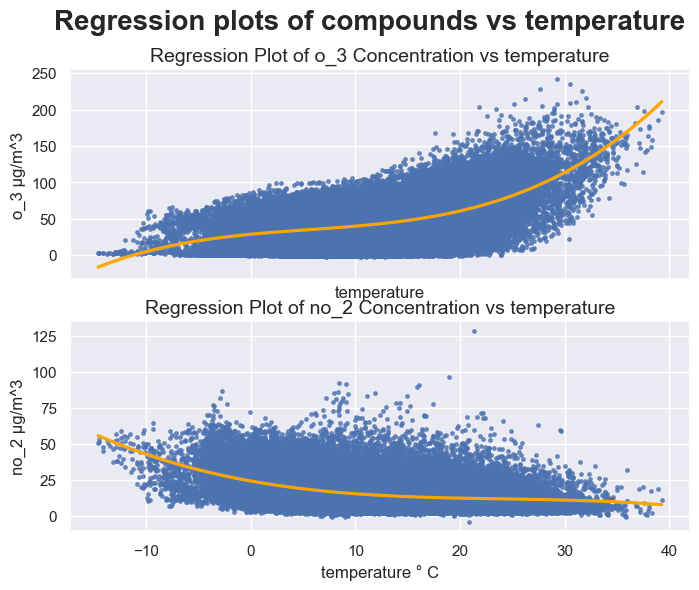

In [40]:
fig, ax = plt.subplots(ncols=1,nrows=2, figsize=(8,6), sharex=True)
fig.suptitle('Regression plots of compounds vs temperature', size=20, weight='bold')

sns.regplot(data=df_data,x=df_data[chosen_weather_factor], y=df_data[compound2],order=3, scatter_kws={'alpha':0.75, 's':6}, line_kws={'color':'orange'},ax=ax[0])
ax[0].set_title(f'Regression Plot of {compound2} Concentration vs {chosen_weather_factor}', size=14)
ax[0].set_ylabel(f'{compound2} {c_unit}')


sns.regplot(x=df_data[chosen_weather_factor], y=df_data[compound1],order=3, scatter_kws={'alpha':0.75, 's':6}, line_kws={'color':'orange'}, ax=ax[1])
ax[1].set_title(f'Regression Plot of {compound1} Concentration vs {chosen_weather_factor}', size=14)
ax[1].set_xlabel(f'{chosen_weather_factor} {w_unit}')
ax[1].set_ylabel(f'{compound1} {c_unit}')

fig.savefig('regression_plots.png')

In [41]:
#// END_TODO [Poster]

---

## Footnotes
$^1$ <span id="fn1"> This is mostly relevant for the `week` column. Because we are using Gregorian years, using [ISO week numbers](https://en.wikipedia.org/wiki/ISO_8601#Week_dates) would lead to unexpected behavior. You could for instance have days in the same (year, week)-pair that are almost 365 days apart. To prevent this we opted to use a different week numbering, with the downside that not all weeks contain 7 days. An alternative solution would have been to use ISO week-numbering years instead of Gregorian years. </span>

$^2$ <span id="fn2"> This information can be found in the dataset documentation of the wind direction. Note that there are also two special wind direction values, namely 0 and 990. The value 0 means "calm", so then the wind speed should be zero and the provided formulas still work. However, the value 990 means "variable" (wind direction) and is a placeholder value. Thus, if we want to be precise we should not treat this as a valid wind direction value and instead set x and y equal to `NaN` when it occurs. You do not have to do this for this task though (but you may), which means you can simply use the given formulas for all (`wind_speed`, `wind_direction`)-pairs. </span>

$^3$ <span id="fn3"> The capitalization of the `X` indicates that it refers to a matrix (2-dimensional), whereas the lowercase `y` indicates that it refers to a vector (1-dimensional). </span>

## References

- AirNow. (n.d.). Air Quality Index (AQI) Basics. AQI Basics | AirNow.gov. Retrieved September 11, 2022, from https://www.airnow.gov/aqi/aqi-basics.
- Czarnecka, M., & Nidzgorska-Lencewicz, J. (2011). Impact of Weather Conditions on Winter and Summer Air Quality. International Agrophysics, 25(1).
- Grell, G., & Baklanov, A. (2011). Integrated Modeling for Forecasting Weather and Air Quality: A Call for Fully Coupled Approaches. Atmospheric Environment, 45(38), 6845-6851.
- NOAA's National Weather Service. (2017, April 6). Weather-Ready Nation  National Program Clearing the Air on Weather and Air Quality. National Weather Service. Retrieved September 11, 2022, from https://www.weather.gov/wrn/summer-article-clearing-the-air.
- Qin, Y., Wagner, F., Scovronick, N., Peng, W., Yang, J., Zhu, T., Smith, K. R., & Mauzerall, D. M. (2017). Air Quality, Health, and Climate Implications of China’s Synthetic Natural Gas Development. PNAS, 114(19).

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [42]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)
feedback_time = 6.5
#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

6.5

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [43]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)
feedback_difficulty = 8
#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

8

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [44]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [45]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [46]:
# List all defined names
%whos

Variable                              Type                          Data/Info
-----------------------------------------------------------------------------
AUTHOR_DATE                           str                           2023-11-23
AUTHOR_ID_NR                          str                           1986619
AUTHOR_NAME                           str                           Jiaqi Wang
COLUMNS_INTERPOLATE                   list                          n=18
DecisionTreeClassifier                ABCMeta                       <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
HTML                                  type                          <class 'IPython.core.display.HTML'>
LinearRegression                      ABCMeta                       <class 'sklearn.linear_mo<...>._base.LinearRegression'>
QUERY_AQ                              str                           \n    SELECT datetime, no<...> station_code='NL10107'\n
QUERY_WEATHER                         str                    

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2023 - **TU/e** - Eindhoven University of Technology